<a href="https://colab.research.google.com/github/stephen5ng/slaythespire/blob/main/SlayTheSpire.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CLASSES

In [3]:
from itertools import combinations
import math
import matplotlib.pyplot as plt
import numpy as np

def average(values):
  return sum([float(v) for v in values])/float(len((values)))

class Card:
  def __init__(
      self, name, type, energy,
      card_draw=0,
      attack=0, attack_multiplier=1,
      vulnerable=0,
      poison=0,
      block=0):
    self.name = name
    self.is_block = block > 0
    self.is_attack = attack > 0
    self.attack = attack
    self.attack_multiplier = attack_multiplier
    self.vulnerable = vulnerable
    self.poison = poison
    self.block = block
    self.energy = energy
  
  def get_block(self, dexterity):
    if not self.is_block:
      return 0
    return self.block + dexterity
  
  def get_attack(self, strength):
    if not self.is_attack:
      return 0
    return (self.attack+strength)*self.attack_multiplier

  def __str__(self):
    return self.name

class Deck:
  def __init__(self, cards):
    self.cards = cards
    self.total_cards = len(cards)
    self.total_block = sum([c.block for c in cards])
    self.number_block_cards = sum([1 if c.is_block else 0 for c in cards])
    self.total_attack = sum([c.attack for c in cards])
    self.number_attack_cards = sum([1 if c.is_attack else 0 for c in cards])
    self.total_energy = sum([c.energy for c in cards])

  def avg_block(self, hand_size):
    return average([c.block for c in self.cards]) * hand_size
  
  def avg_attack(self, hand_size):
    return average([c.attack for c in self.cards]) * hand_size

  def avg_energy(self, hand_size):
    return average([c.energy for c in self.cards]) * hand_size

  def __str__(self):
    return "\n".join([c.name for c in self.cards])

class Hand:
  def __init__(self, cards, dexterity, strength):
    self.cards = [card.name for card in cards]
    self.total_block = sum([card.get_block(dexterity) for card in cards])
    self.total_attack = sum([card.get_attack(strength) for card in cards])
    self.total_energy = sum([card.energy for card in cards])

  def __str__(self):
    return "%s => BLOCK: %d, ATTACK: %d" % (
        ", ".join(self.cards), self.total_block, self.total_attack)
    
class Hands:
  def __init__(self, deck, hand_size=5, dexterity=0, strength=0):
    self.deck = deck
    self.hand_size = hand_size
    self.dexterity = dexterity
    self.strength = strength
    self.hands = self.get_combinations()
    self.block_distribution = [h.total_block for h in self.hands]
    self.attack_distribution = [h.total_attack for h in self.hands]
    self.energy_distribution = [h.total_energy for h in self.hands]

  def get_combinations(self):
    hands = combinations(self.deck.cards, self.hand_size)
    all_combinations = []
    for hand in hands:
      all_combinations.append(Hand(hand, self.dexterity, self.strength))
    return all_combinations

  def graph(title, distribution, width, the_bins=None):
    plt.hist(distribution, bins=the_bins, width=width, density=True)
    plt.locator_params(axis='x', nbins=len(the_bins))
    plt.title(title)

  def graph_block_distribution(self, bin_size=5):
    bin_max = math.ceil(max(self.block_distribution)/bin_size) + 2
    the_bins = [i*bin_size for i in range(0, bin_max)]
    Hands.graph("BLOCK PER HAND", self.block_distribution, 3, the_bins=the_bins)

  def graph_attack_distribution(self, bin_size=5):
    bin_max = math.ceil(max(self.attack_distribution)/bin_size) + 2
    the_bins = [i*bin_size for i in range(0, bin_max)]
    Hands.graph("ATTACK PER HAND", self.attack_distribution, 3, the_bins=the_bins)

  def graph_energy_distribution(self):
    Hands.graph(
        "ENERGY COST PER HAND",
        self.energy_distribution,
        0.5,
        the_bins=[i for i in range(1, max(self.energy_distribution) + 2)])
    
  def print_compare_text(self, description, me, other):
    print("%s: %f => %f" % (description, me, other))

  def print_compare_graph(self, my_graph, other_graph):
    plt.subplot(1, 2, 1)
    my_graph()
    plt.subplot(1, 2, 2)
    other_graph()
    plt.show()

  def compare(self, other):
    d = self.deck
    o = other.deck
    self.print_compare_text("Number of Cards", d.total_cards, o.total_cards)
    self.print_compare_text(
        "Number of Attack Cards", d.number_attack_cards, o.number_attack_cards)
    self.print_compare_text(
        "Number of Block Cards", d.number_block_cards, o.number_block_cards)
    
    print("\nATTACKS\n")
    self.print_compare_text("Total Attack", d.total_attack, o.total_attack)
    self.print_compare_text(
        "Avg Attack Per Hand", d.avg_attack(self.hand_size), o.avg_attack(other.hand_size)
    )
    print("\n")
    self.print_compare_graph(
        self.graph_attack_distribution, other.graph_attack_distribution)

    print("\nBLOCKS\n")
    self.print_compare_text("Total Block", d.total_block, o.total_block)
    self.print_compare_text(
        "Avg Block Per Hand", d.avg_block(self.hand_size), o.avg_block(other.hand_size))
    print("\n")
    self.print_compare_graph(
        self.graph_block_distribution, other.graph_block_distribution
    )

    print("\nENERGY\n")
    self.print_compare_text("Total Energy", d.total_energy, o.total_energy)
    self.print_compare_text("Avg Energy Per Hand", d.avg_energy(self.hand_size), o.avg_energy(other.hand_size))
    print("\n")
    self.print_compare_graph(
        self.graph_energy_distribution, other.graph_energy_distribution)
    

  def visualize(self):
    print("******************************************")
    print("Number of Cards: %d" % self.deck.total_cards)

    print("Number of Attack Cards %d" % self.deck.number_attack_cards)
    print("Number of Block Cards: %d" % self.deck.number_block_cards)

    print("\nATTACKS\n")
    print("Total Attack: %d" % self.deck.total_attack)
    print("Avg Attack Per Hand: %f" % self.deck.avg_attack(self.hand_size))
    print("\n")
    self.graph_attack_distribution()
    plt.show()

    print("\nBLOCKS\n")
    print("Total Block: %d" %  self.deck.total_block)
    print("Avg Block Per Hand: %f" % self.deck.avg_block(self.hand_size))
    print("\n")
    self.graph_block_distribution()
    plt.show()

    print("\nENERGY COST PER HAND\n")
    print("Total Energy: %d" % self.deck.total_energy)
    print("Avg Energy Per Hand: %f" % self.deck.avg_energy(self.hand_size))
    self.graph_energy_distribution()
    plt.show()

# CARDS

In [58]:
ACROBATICS_PLUS = Card("Acrobatics+", "Skill", 1)
ADRENALINE = Card("Adrenaline", "Skill", 0)
AFTER_IMAGE_PLUS = Card("After Image+", "Power", 1)
BACKFLIP_PLUS = Card("Backflip+", "Skill", 1, block=8)
BANDAGE_UP = Card("Bandage Up", "Skill", 0)
BANE = Card("Bane", "Attack", 1, attack=7)
BASH = Card("Bash", "Attack", 2, attack=8, vulnerable=2)
BASH_PLUS = Card("Bash", "Attack", 2, attack=10, vulnerable=3)
BLADE_DANCE = Card(
    "Blade Dance", "Skill", 1, attack=4, attack_multiplier=3)
BLUR = Card("Blur", "Skill", 1, block=5)
BLUR_PLUS = Card("Blur+", "Skill", 1, block=8)
BOUNCING_FLASK = Card("Bouncing Flask", "Skill", 2, poison=9)
CLOAK_AND_DAGGER = Card(
    "Cloak and Dagger", "Skill", 1, attack=4, block=6)
CLOAK_AND_DAGGER_PLUS = Card(
    "Cloak and Dagger+", "Skill", 1, attack=4, attack_multiplier=2, block=6)
DAGGER_SPRAY_PLUS = Card(
    "Dagger Spray+", "Skill", 1, attack=6, attack_multiplier=2)
DAGGER_THROW = Card("Dagger Throw", "Attack", 1, attack=9)
DASH_PLUS = Card("Dash+", "Attack", 2, attack=13, block=13)
DEADLY_POISON = Card("Deadly Poison", "Skill", 1, poison=5)
DEADLY_POISON_PLUS = Card("Deadly Poison+", "Skill", 1, poison=8)
DEFEND = Card("Defend", "Skill", 1, block=5)
DEFEND_PLUS = Card("Defend+", "Skill", 1, block=8)
DODGE_AND_ROLL_PLUS = Card("Dodge and Roll+", "Skill", 1, block=6) #### ????
ENVENOM = Card("Envenom", "Power", 2)
ENVENOM_PLUS = Card("Envenom+", "Power", 1)
FINISHER_PLUS = Card("Finisher+", "Attack", 1) ### ?????
FOOTWORK = Card("Footwork", "Power", 1)
FOOTWORK_PLUS = Card("Footwork+", "Power", 1)
GLASS_KNIFE = Card("Glass Knife", "Attack", 1, attack=8, attack_multiplier=2)
HEEL_HOOK = Card("Heel Hook", "Attack", 1, attack=5)
LEG_SWEEP_PLUS = Card("Leg Sweep+", "Skill", 2, block=14)
NEUTRALIZE = Card("Neutralize", "Attack", 0, attack=3)
NEUTRALIZE_PLUS = Card("Neutralize+", "Attack", 0, attack=4)
NOXIOUS_FUMES = Card("Noxious Fumes", "Power", 1)
PIERCING_WAIL = Card("Piercing Wail", "Skill", 1)
PIERCING_WAIL_PLUS = Card("Piercing Wail+", "Skill", 1)
POISONED_STAB = Card("Poisoned Stab", "Attack", 1, attack=6)
PREDATOR = Card("Predator", "Attack", 2, attack=15)
PREDATOR_PLUS = Card("Predator", "Attack", 2, attack=20)
QUICK_SLASH = Card("Quick Slash", "Attack", 1, attack=8)
SNEAKY_STRIKE = Card("Sneaky Strike+", "Attack", 2, attack=12)
SNEAKY_STRIKE_PLUS = Card("Sneaky Strike", "Attack", 2, attack=16)
STRIKE = Card("Strike", "Attack", 1, attack=6)
STRIKE_PLUS = Card("Strike+", "Attack", 1, attack=9)
SURVIVOR = Card("Survivor", "Skill", 1, block=8)
SURVIVOR_PLUS = Card("Survivor", "Skill", 1, block=11)
THOUSAND_CUTS = Card("Thousand Cuts", "Power", 1)
TOOLS_OF_THE_TRADE_PLUS = Card("Tools of the Trade", "Power", 0)
WELL_LAID_PLANS = Card("Well Laid Plans", "Power", 1)
WELL_LAID_PLANS_PLUS = Card("Well Laid Plans", "Power", 1)

STARTER_DECK = Deck([STRIKE, STRIKE, STRIKE, STRIKE, STRIKE,
                DEFEND, DEFEND, DEFEND, DEFEND, DEFEND, NEUTRALIZE])

# MONSTERS


In [5]:
import enum

class Mode(enum.Enum):
  INCANTATION = 1
  DARK_STRIKE = 2

class Cultist:
  def __init__(self):
    self.hp = 44
    self.mode = Mode.INCANTATION
    self.strength = 0
  
  def attack(self):
    if self.mode == Mode.INCANTATION:
      return 0
    
    return 6 + self.strength

  def defend(self, incoming_damage):
    self.hp -= incoming_damage
    self.hp = max(0, self.hp)

  def next_turn(self):
    self.strength += 4
    if self.mode == Mode.INCANTATION:
      self.mode = Mode.DARK_STRIKE

# CHARACTERS



In [53]:
# Plays "average" hand on each turn.
# All the multi-shot attack cards are averaged into a single super-attack card;
# same for all the multi-shot defense cards.

# On each turn, we try to play as many attack cards as possible; this gets us an
# idealized attack.
# The maximum number of cards that can be played is gated on either:
# - The amount of available energy (default 3)
# - The number of attack cards drawn (default 6/10 * 5 = 3)

IRONCLAD_STARTER_DECK = Deck([STRIKE, STRIKE, STRIKE, STRIKE, STRIKE,
                DEFEND, DEFEND, DEFEND, DEFEND, BASH])

class Ironclad:  
  def __init__(self, deck = None):
    self.hp = 80
    self.deck = deck if deck else IRONCLAD_STARTER_DECK
    self.average_attack = 0
    self.average_vulnerable = 0
    self.average_energy_per_attack_card = 0
    attack_total = 0
    vulnerable_total = 0
    attack_cards_count = 0
    attack_energy_total = 0
    
    for card in self.deck.cards:
      attack_total += card.attack
      vulnerable_total += card.vulnerable
      attack_cards_count += 1 if card.is_attack else 0
      attack_energy_total += card.energy if card.is_attack else 0
  
    self.average_attack_cards_per_card = (attack_cards_count /
                                          len(self.deck.cards))
    self.average_attack = attack_total / attack_cards_count
    self.average_vulnerable = vulnerable_total / attack_cards_count
    self.average_energy_per_attack_card = (attack_energy_total /
                                           attack_cards_count)

  def __str__(self):
    return("attack: " + str(self.average_attack) + " vulnerable: " +
           str(self.average_vulnerable) + 
           " density: " + str(self.average_attack_cards_per_card) + 
           " cost: " + str(self.average_energy_per_attack_card))

  def attack(self):
    attack_cards_drawn = 5 * self.average_attack_cards_per_card
    attack_cards_bought = 3 / self.average_energy_per_attack_card
    attack_cards = min(attack_cards_drawn, attack_cards_bought)
    print("attacking cards played: " + str(attack_cards))
    return self.average_attack * attack_cards

ic = Ironclad()



# PLAY

In [69]:
player = Ironclad()
monster = Cultist()

print(player)
print(player.deck)
# Frontloaded damage is the total damage over 5 turns, scaled by 1 / (2^turn).
# It includes 50% attack bonus for Vulnerable.
# It assumes only attack cards are played (i.e. the best-case-scenario).

def calc_frontloaded_damage(player):
  frontloaded_damage = 0.0
  frontloaded_multiplier = 1.0
  for turn in range(1,21):
    player_attack = player.attack()
    damage = player_attack * (1+player.average_vulnerable*0.5)
    print("attacking: " + str(player_attack) + ", " + str(damage))
    if turn <= 5:
      frontloaded_damage += damage * frontloaded_multiplier
      frontloaded_multiplier /= 2.0

  return frontloaded_damage

BASH_PLUS_DECK = Deck([STRIKE, STRIKE, STRIKE, STRIKE, STRIKE,
                DEFEND, DEFEND, DEFEND, DEFEND, BASH_PLUS])
baseline = calc_frontloaded_damage(player)
bash_plus = calc_frontloaded_damage(Ironclad(BASH_PLUS_DECK))

print("Upgrading Bash to Bash+ increases frontload damage by " + 
       str(100 * ((bash_plus / baseline) - 1)) + " percent")

attack: 6.333333333333333 vulnerable: 0.3333333333333333 density: 0.6 cost: 1.1666666666666667
Strike
Strike
Strike
Strike
Strike
Defend
Defend
Defend
Defend
Bash
attacking cards played: 2.571428571428571
attacking: 16.285714285714285, 19.0
attacking cards played: 2.571428571428571
attacking: 16.285714285714285, 19.0
attacking cards played: 2.571428571428571
attacking: 16.285714285714285, 19.0
attacking cards played: 2.571428571428571
attacking: 16.285714285714285, 19.0
attacking cards played: 2.571428571428571
attacking: 16.285714285714285, 19.0
attacking cards played: 2.571428571428571
attacking: 16.285714285714285, 19.0
attacking cards played: 2.571428571428571
attacking: 16.285714285714285, 19.0
attacking cards played: 2.571428571428571
attacking: 16.285714285714285, 19.0
attacking cards played: 2.571428571428571
attacking: 16.285714285714285, 19.0
attacking cards played: 2.571428571428571
attacking: 16.285714285714285, 19.0
attacking cards played: 2.571428571428571
attacking: 16.2

# VISUALIZE DECK

******************************************
Number of Cards: 13
Number of Attack Cards 6
Number of Block Cards: 6

ATTACKS

Total Attack: 33
Avg Attack Per Hand: 12.692308




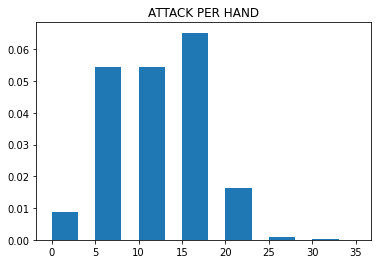


BLOCKS

Total Block: 33
Avg Block Per Hand: 12.692308




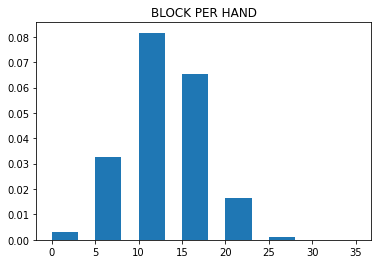


ENERGY COST PER HAND

Total Energy: 13
Avg Energy Per Hand: 5.000000


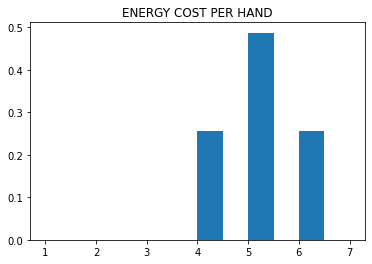




COMPARE

Number of Cards: 13.000000 => 11.000000
Number of Attack Cards: 6.000000 => 6.000000
Number of Block Cards: 6.000000 => 5.000000

ATTACKS

Total Attack: 33.000000 => 33.000000
Avg Attack Per Hand: 12.692308 => 15.000000




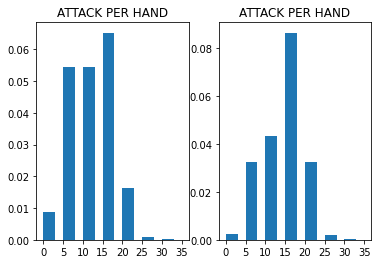


BLOCKS

Total Block: 33.000000 => 25.000000
Avg Block Per Hand: 12.692308 => 11.363636




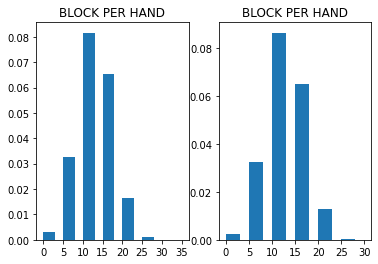


ENERGY

Total Energy: 13.000000 => 10.000000
Avg Energy Per Hand: 5.000000 => 4.545455




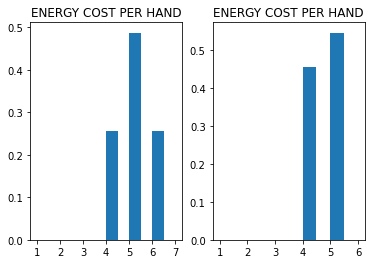

In [ ]:
import matplotlib.pyplot as plt
from itertools import combinations
import numpy as np

a2_deck = Deck([
        ADRENALINE, AFTER_IMAGE_PLUS, GLASS_KNIFE, TOOLS_OF_THE_TRADE_PLUS,
        BLUR, DASH_PLUS, FINISHER_PLUS, FOOTWORK_PLUS, FOOTWORK_PLUS,
        HEEL_HOOK, ACROBATICS_PLUS, ACROBATICS_PLUS, BLADE_DANCE,
        CLOAK_AND_DAGGER, CLOAK_AND_DAGGER_PLUS, CLOAK_AND_DAGGER_PLUS,
        DAGGER_SPRAY_PLUS, DAGGER_THROW, PIERCING_WAIL, PIERCING_WAIL_PLUS,
        SNEAKY_STRIKE_PLUS, SNEAKY_STRIKE_PLUS, NEUTRALIZE_PLUS,
        STRIKE_PLUS, STRIKE_PLUS, STRIKE_PLUS, SURVIVOR, BANDAGE_UP,
        DEFEND_PLUS, DEFEND_PLUS, DEFEND_PLUS])

starter_hands = Hands(STARTER_DECK)

# Base deck: Attack ~15 per turn
# Defense ~10 per turn
new_cards = [
            STRIKE, STRIKE, STRIKE, STRIKE, STRIKE,
            DEFEND, DEFEND, DEFEND, DEFEND, DEFEND,
            SURVIVOR, NEUTRALIZE, BOUNCING_FLASK
          ]
current_hands = Hands(Deck(new_cards))

p_cards = [
          ]
p_hands = Hands(Deck(p_cards), hand_size=5)

current_hands.visualize()
print("\n\n\nCOMPARE\n")
current_hands.compare(starter_hands)
#current_hands.compare(p_hands)